In [372]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from catboost import CatBoostRegressor
#from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GridSearchCV
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
#things we should do:
#Export data analysis
#accurate preprosessing, remove outliers
#strong model
#hyperparamter tuning and validation as times series validation is key thing here
#stacking, to merge diffrent strong models
#result analysis, what are the most important featurs
#lectures will give insights of how to these things
#find out what featurs that 

#tips fra gutta på sal<3
#bruke H20 AutoML
#bruke gjennomsnitt power output over en time istedenfor hver variabel



In [373]:
def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

list_directory_tree_with_os_walk('.')

Directory: .
  File: .DS_Store
  File: my_first_submission.csv
  File: Readme.md
  File: read_files.ipynb
  File: sample_submission.csv
  File: test.csv
Directory: .\A
  File: train_targets.parquet
  File: X_test_estimated.parquet
  File: X_train_estimated.parquet
  File: X_train_observed.parquet
Directory: .\B
  File: train_targets.parquet
  File: X_test_estimated.parquet
  File: X_train_estimated.parquet
  File: X_train_observed.parquet
Directory: .\C
  File: train_targets.parquet
  File: X_test_estimated.parquet
  File: X_train_estimated.parquet
  File: X_train_observed.parquet
Directory: .\catboost_info
  File: catboost_training.json
  File: learn_error.tsv
  File: test_error.tsv
  File: time_left.tsv
Directory: .\catboost_info\learn
  File: events.out.tfevents
Directory: .\catboost_info\test
  File: events.out.tfevents
Directory: .\catboost_info\tmp
  File: cat_feature_index.183104b5-642a4438-9869cb06-fbb87aec.tmp
  File: cat_feature_index.275b4d3c-85b73e49-69c60451-ec9fcb4b.tmp
 

In [374]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

#interpolation and moving avarage, test this again with new model
'''# Set the index to the time column
train_a.set_index('time', inplace=True)
train_b.set_index('time', inplace=True)
train_c.set_index('time', inplace=True)

# Replace zero values with NaN
train_a.replace(0, np.nan, inplace=True)
train_b.replace(0, np.nan, inplace=True)
train_c.replace(0, np.nan, inplace=True)

# Perform time-based interpolation
train_a.interpolate(method='time', inplace=True)
train_b.interpolate(method='time', inplace=True)
train_c.interpolate(method='time', inplace=True)

# Define the window size for the moving average
window_size = 3

# Compute the moving average
train_a_smoothed = train_a.rolling(window=window_size).mean()
train_b_smoothed = train_b.rolling(window=window_size).mean()
train_c_smoothed = train_c.rolling(window=window_size).mean()

# Assuming all datasets have the same features
features = [col for col in train_a.columns]

for feature_name in features:
    fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
    
    # Plotting for dataset A
    train_a[feature_name].plot(ax=axs[0], title=f'Train A - {feature_name}')
    train_a_smoothed[feature_name].plot(ax=axs[0], linestyle='--', label=f'{window_size}-Day Moving Average')
    
    # Plotting for dataset B
    train_b[feature_name].plot(ax=axs[1], title=f'Train B - {feature_name}')
    train_b_smoothed[feature_name].plot(ax=axs[1], linestyle='--', label=f'{window_size}-Day Moving Average')
    
    # Plotting for dataset C
    train_c[feature_name].plot(ax=axs[2], title=f'Train C - {feature_name}')
    train_c_smoothed[feature_name].plot(ax=axs[2], linestyle='--', label=f'{window_size}-Day Moving Average')
    
    # Adding legends
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    
    plt.tight_layout()
    plt.show()

# Replace zero values with NaN
train_a_smoothed.replace(np.nan,0, inplace=True)
train_b_smoothed.replace(np.nan,0, inplace=True)
train_c_smoothed.replace(np.nan,0, inplace=True)

train_a.replace( np.nan,0, inplace=True)
train_b.replace(np.nan,0, inplace=True)
train_c.replace( np.nan,0, inplace=True)'''

"# Set the index to the time column\ntrain_a.set_index('time', inplace=True)\ntrain_b.set_index('time', inplace=True)\ntrain_c.set_index('time', inplace=True)\n\n# Replace zero values with NaN\ntrain_a.replace(0, np.nan, inplace=True)\ntrain_b.replace(0, np.nan, inplace=True)\ntrain_c.replace(0, np.nan, inplace=True)\n\n# Perform time-based interpolation\ntrain_a.interpolate(method='time', inplace=True)\ntrain_b.interpolate(method='time', inplace=True)\ntrain_c.interpolate(method='time', inplace=True)\n\n# Define the window size for the moving average\nwindow_size = 3\n\n# Compute the moving average\ntrain_a_smoothed = train_a.rolling(window=window_size).mean()\ntrain_b_smoothed = train_b.rolling(window=window_size).mean()\ntrain_c_smoothed = train_c.rolling(window=window_size).mean()\n\n# Assuming all datasets have the same features\nfeatures = [col for col in train_a.columns]\n\nfor feature_name in features:\n    fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)\n    \n   

In [ ]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')
#print(X_train_estimated_a.dtypes)
#print(X_train_estimated_a.nunique())
print(X_train_estimated_a['date_calc'])
'''okey, can you make a code in python that test Feature Transformation: Try transforming these features (e.g., logarithmic, polynomial transformations) to see if they can be made more predictive.
Feature Interaction: Create interaction terms between features. Sometimes, the combination of two features can be more predictive than each feature on its own. on our data, do some diffrent transformations and try to feature interact all possibilities and give me back the best feature eng'''

date_calc                           184
date_forecast                     17576
absolute_humidity_2m:gm3             79
air_density_2m:kgm3                 162
ceiling_height_agl:m              10832
clear_sky_energy_1h:J              6863
clear_sky_rad:W                    3270
cloud_base_agl:m                  11280
dew_or_rime:idx                       3
dew_point_2m:K                      275
diffuse_rad:W                      1798
diffuse_rad_1h:J                   6868
direct_rad:W                       1968
direct_rad_1h:J                    5543
effective_cloud_cover:p            1001
elevation:m                           1
fresh_snow_12h:cm                    84
fresh_snow_1h:cm                     22
fresh_snow_24h:cm                   127
fresh_snow_3h:cm                     41
fresh_snow_6h:cm                     59
is_day:idx                            2
is_in_shadow:idx                      2
msl_pressure:hPa                    704
precip_5min:mm                       23


'okey, can you make a code in python that test Feature Transformation: Try transforming these features (e.g., logarithmic, polynomial transformations) to see if they can be made more predictive.\nFeature Interaction: Create interaction terms between features. Sometimes, the combination of two features can be more predictive than each feature on its own. on our data, do some diffrent transformations and try to feature interact all possibilities and give me back the best feature eng'

In [412]:
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')
#sjekker antall variabler som er nan
'''nan_counts_a = X_train_observed_a.isna().sum()
nan_counts_b = X_train_observed_b.isna().sum()
nan_counts_c = X_train_observed_c.isna().sum()

print("NaN counts for X_test_a:\n", nan_counts_a)

print("\nNaN counts for X_test_b:\n", nan_counts_b)
print("\nNaN counts for X_test_c:\n", nan_counts_c)'''

NaN counts for X_test_a:
 date_forecast                          0
absolute_humidity_2m:gm3               0
air_density_2m:kgm3                    0
ceiling_height_agl:m               22247
clear_sky_energy_1h:J                  0
clear_sky_rad:W                        0
cloud_base_agl:m                    8066
dew_or_rime:idx                        0
dew_point_2m:K                         0
diffuse_rad:W                          0
diffuse_rad_1h:J                       0
direct_rad:W                           0
direct_rad_1h:J                        0
effective_cloud_cover:p                0
elevation:m                            0
fresh_snow_12h:cm                      0
fresh_snow_1h:cm                       0
fresh_snow_24h:cm                      0
fresh_snow_3h:cm                       0
fresh_snow_6h:cm                       0
is_day:idx                             0
is_in_shadow:idx                       0
msl_pressure:hPa                       0
precip_5min:mm                 

In [413]:
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')
nan_counts_a = X_test_estimated_a.isna().sum()
nan_counts_b = X_test_estimated_b.isna().sum()
nan_counts_c = X_test_estimated_c.isna().sum()

print("NaN counts for X_test_a:\n", nan_counts_a)

print("\nNaN counts for X_test_b:\n", nan_counts_b)
print("\nNaN counts for X_test_c:\n", nan_counts_c)

NaN counts for X_test_a:
 date_calc                            0
date_forecast                        0
absolute_humidity_2m:gm3             0
air_density_2m:kgm3                  0
ceiling_height_agl:m               793
clear_sky_energy_1h:J                0
clear_sky_rad:W                      0
cloud_base_agl:m                   298
dew_or_rime:idx                      0
dew_point_2m:K                       0
diffuse_rad:W                        0
diffuse_rad_1h:J                     0
direct_rad:W                         0
direct_rad_1h:J                      0
effective_cloud_cover:p              0
elevation:m                          0
fresh_snow_12h:cm                    0
fresh_snow_1h:cm                     0
fresh_snow_24h:cm                    0
fresh_snow_3h:cm                     0
fresh_snow_6h:cm                     0
is_day:idx                           0
is_in_shadow:idx                     0
msl_pressure:hPa                     0
precip_5min:mm                       0

In [378]:
#Merging estimated and observed data with the power output, but we might need to investigate if there is some differece in observed weather and weather forcast
# Combine estimated and observed data for location A
X_train_a = pd.concat([X_train_estimated_a, X_train_observed_a])

# Merge features and target data for location A
merged_data_a = pd.merge(X_train_a, train_a, left_on='date_forecast', right_on='time')


# Combine estimated and observed data for location A
X_train_b = pd.concat([X_train_estimated_b, X_train_observed_b])

# Merge features and target data for location A
merged_data_b = pd.merge(X_train_b, train_b, left_on='date_forecast', right_on='time')

# Now, calculate the correlation matrix
correlation_matrix_b = merged_data_b.corr()

# You might want to focus on the correlations with the target variable
correlations_with_target_b = correlation_matrix_b['pv_measurement'].sort_values(ascending=False)
#print(correlations_with_target_b)

# Combine estimated and observed data for location A
X_train_c = pd.concat([X_train_estimated_c, X_train_observed_c])

# Merge features and target data for location A
merged_data_c = pd.merge(X_train_c, train_c, left_on='date_forecast', right_on='time')



In [379]:
#Here we are calculating the lineral correlation of each feature to the power output
# Now, calculate the correlation matrix
correlation_matrix_a = merged_data_a.corr()

# You might want to focus on the correlations with the target variable
correlations_with_target_a = correlation_matrix_a['pv_measurement'].sort_values(ascending=False)
#print(correlations_with_target_a)

# Now, calculate the correlation matrix
correlation_matrix_b = merged_data_b.corr()

# You might want to focus on the correlations with the target variable
correlations_with_target_b = correlation_matrix_b['pv_measurement'].sort_values(ascending=False)
#print(correlations_with_target_b)

# Now, calculate the correlation matrix
correlation_matrix_c = merged_data_c.corr()

# You might want to focus on the correlations with the target variable
correlations_with_target_c = correlation_matrix_c['pv_measurement'].sort_values(ascending=False)
#print(correlations_with_target_c)


# Create a DataFrame to hold the correlation values
correlation_comparison = pd.DataFrame({
    'Feature': correlations_with_target_a.index,
    'Location_A': correlations_with_target_a.values,
    'Location_B': correlations_with_target_b.reindex(correlations_with_target_a.index).values,
    'Location_C': correlations_with_target_c.reindex(correlations_with_target_a.index).values
})

# Calculate the absolute difference in correlation values across locations
correlation_comparison['Max_Diff'] = correlation_comparison.apply(
    lambda row: max(row['Location_A'], row['Location_B'], row['Location_C']) - 
                min(row['Location_A'], row['Location_B'], row['Location_C']), axis=1)


# Sort the DataFrame based on the difference in correlation values
correlation_comparison = correlation_comparison.sort_values(by='Max_Diff', ascending=False)
# Print the DataFrame
print(correlation_comparison)


                           Feature  Location_A  Location_B  Location_C  \
12                    visibility:m    0.228371    0.121831    0.151019   
23                     prob_rime:p   -0.041333   -0.021046   -0.113571   
9                      t_1000hPa:K    0.335902    0.416585    0.427087   
11        absolute_humidity_2m:gm3    0.236673    0.323513    0.319422   
10                  dew_point_2m:K    0.245950    0.323798    0.325013   
26                 dew_or_rime:idx   -0.057400   -0.024646    0.018164   
45                is_in_shadow:idx   -0.576389   -0.510066   -0.584903   
22                            time   -0.033503   -0.107539   -0.052976   
21                   date_forecast   -0.033503   -0.107539   -0.052976   
40             total_cloud_cover:p   -0.187265   -0.142365   -0.117943   
41         effective_cloud_cover:p   -0.216672   -0.171663   -0.147640   
43             air_density_2m:kgm3   -0.356402   -0.367909   -0.421306   
4            clear_sky_energy_1h:J    

<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

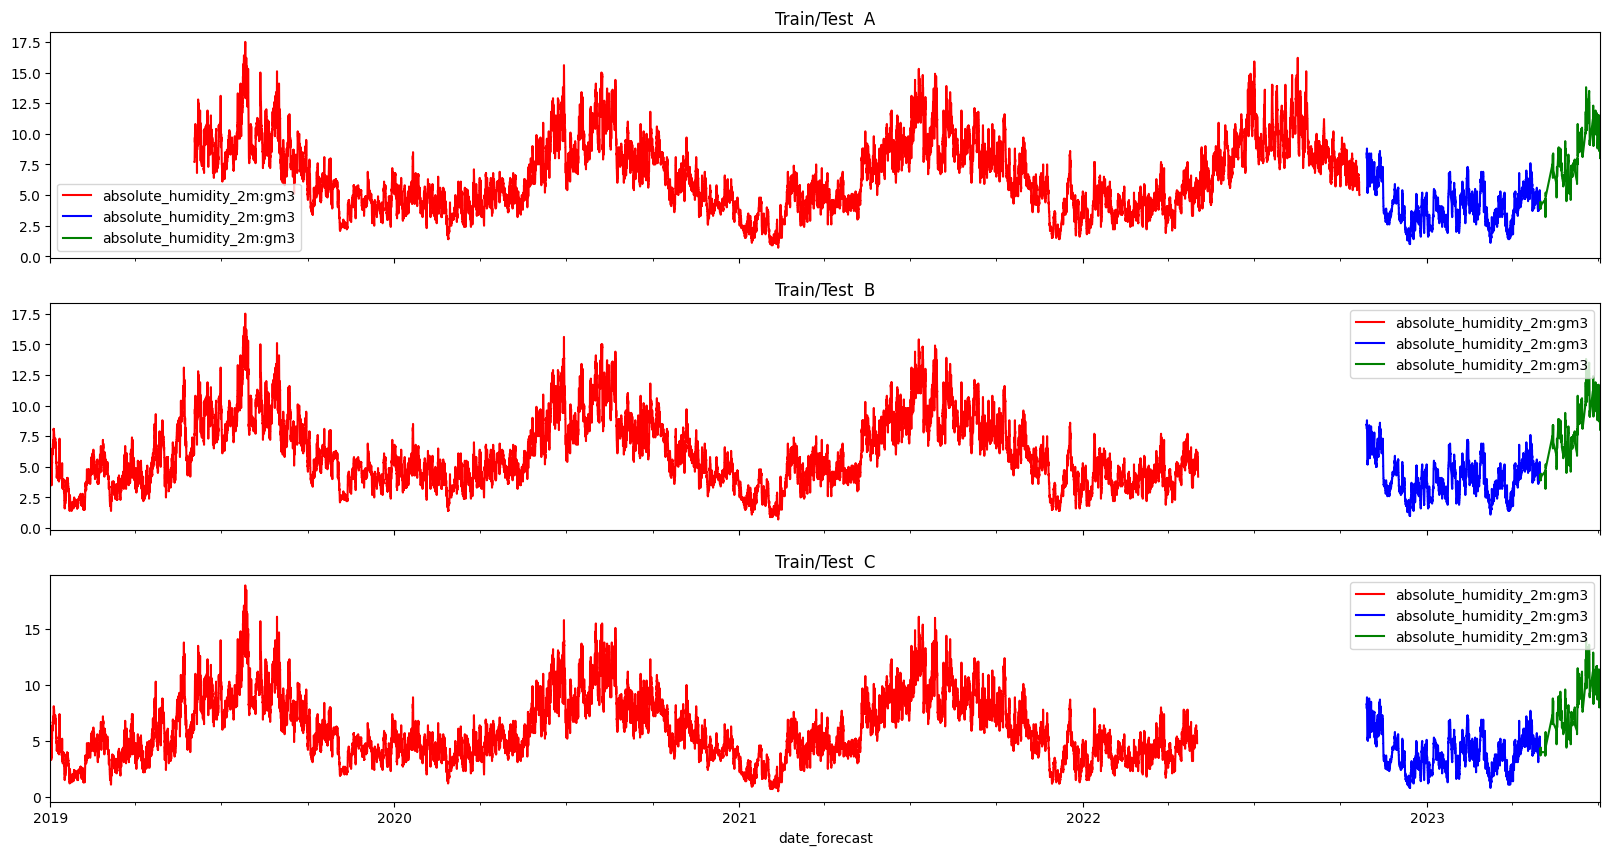

In [380]:
# Plotting a single feature
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = 'absolute_humidity_2m:gm3'
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')

In [381]:
test = pd.read_csv('test.csv')
test


,id,time,prediction,location
0,0,2023-05-01 00:00:00,0,A
1,1,2023-05-01 01:00:00,0,A
2,2,2023-05-01 02:00:00,0,A
3,3,2023-05-01 03:00:00,0,A
4,4,2023-05-01 04:00:00,0,A
...,...,...,...,...
2155,2155,2023-07-03 19:00:00,0,C
2156,2156,2023-07-03 20:00:00,0,C
2157,2157,2023-07-03 21:00:00,0,C
2158,2158,2023-07-03 22:00:00,0,C


In [382]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,id,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
2155,2155,0
2156,2156,0
2157,2157,0
2158,2158,0


In [383]:
# Example, let the predictions be random values
test['prediction'] = np.random.rand(len(test))
print(test)
sample_submission = sample_submission[['id']].merge(test[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('my_first_submission.csv', index=False)

        id                 time  prediction location
0        0  2023-05-01 00:00:00    0.887081        A
1        1  2023-05-01 01:00:00    0.381061        A
2        2  2023-05-01 02:00:00    0.518988        A
3        3  2023-05-01 03:00:00    0.292557        A
4        4  2023-05-01 04:00:00    0.898509        A
...    ...                  ...         ...      ...
2155  2155  2023-07-03 19:00:00    0.798737        C
2156  2156  2023-07-03 20:00:00    0.583306        C
2157  2157  2023-07-03 21:00:00    0.589123        C
2158  2158  2023-07-03 22:00:00    0.170203        C
2159  2159  2023-07-03 23:00:00    0.173727        C

[2160 rows x 4 columns]


In [384]:
def rmsle(y_true, y_pred):
    """
    Computes the Root Mean Squared Logarithmic Error 
    
    Args:
        y_true (np.array): n-dimensional vector of ground-truth values 
        y_pred (np.array): n-dimensional vecotr of predicted values 
    
    Returns:
        A scalar float with the rmsle value 
    
    Note: You can alternatively use sklearn and just do: 
        sklearn.metrics.mean_squared_log_error(y_true, y_pred) ** 0.5
    """
    assert (y_true >= 0).all(), 'Received negative y_true values'
    assert (y_pred >= 0).all(), 'Received negative y_pred values'
    assert y_true.shape == y_pred.shape, 'y_true and y_pred have different shapes'
    y_true_log1p = np.log1p(y_true)  # log(1 + y_true)
    y_pred_log1p = np.log1p(y_pred)  # log(1 + y_pred)
    return np.sqrt(np.mean(np.square(y_pred_log1p - y_true_log1p)))

In [415]:
#Managing the data

X_train_a = pd.concat([X_train_observed_a, X_train_estimated_a])
X_train_b = pd.concat([X_train_observed_b, X_train_estimated_b])
X_train_c = pd.concat([X_train_observed_c, X_train_estimated_c])
print(X_train_a['snow_density:kgm3'])
# Split the merged data into features (X) and target (y)
merged_data = pd.merge(X_train_a, train_a, left_on='date_forecast', right_on='time')
merged_data_b = pd.merge(X_train_b, train_b, left_on='date_forecast', right_on='time')
merged_data_c = pd.merge(X_train_c, train_c, left_on='date_forecast', right_on='time')

#Adding hour, day month and year as parameters in the model from dataforecast
merged_data['hour'] = merged_data['date_forecast'].dt.hour
merged_data['day'] = merged_data['date_forecast'].dt.day
merged_data['month'] = merged_data['date_forecast'].dt.month
merged_data['year'] = merged_data['date_forecast'].dt.year

merged_data_b['hour'] = merged_data_b['date_forecast'].dt.hour
merged_data_b['day'] = merged_data_b['date_forecast'].dt.day
merged_data_b['month'] = merged_data_b['date_forecast'].dt.month
merged_data_b['year'] = merged_data_b['date_forecast'].dt.year

merged_data_c['hour'] = merged_data_c['date_forecast'].dt.hour
merged_data_c['day'] = merged_data_c['date_forecast'].dt.day
merged_data_c['month'] = merged_data_c['date_forecast'].dt.month
merged_data_c['year'] = merged_data_c['date_forecast'].dt.year

#Splitting into X and Y values
y = merged_data['pv_measurement']
X = merged_data.drop(columns=['pv_measurement', 'date_forecast', 'date_calc', 'time'])

y_b = merged_data_b['pv_measurement']
X_b = merged_data_b.drop(columns=['pv_measurement', 'date_forecast', 'date_calc','time'])

y_c = merged_data_c['pv_measurement']
X_c = merged_data_c.drop(columns=['pv_measurement', 'date_forecast', 'date_calc','time'])

#Same but for the test estimated set
X_test_estimated_a['hour'] = X_test_estimated_a['date_forecast'].dt.hour
X_test_estimated_a['day'] = X_test_estimated_a['date_forecast'].dt.day
X_test_estimated_a['month'] = X_test_estimated_a['date_forecast'].dt.month
X_test_estimated_a['year'] = X_test_estimated_a['date_forecast'].dt.year

X_test_estimated_b['hour'] = X_test_estimated_b['date_forecast'].dt.hour
X_test_estimated_b['day'] = X_test_estimated_b['date_forecast'].dt.day
X_test_estimated_b['month'] = X_test_estimated_b['date_forecast'].dt.month
X_test_estimated_b['year'] = X_test_estimated_b['date_forecast'].dt.year

X_test_estimated_c['hour'] = X_test_estimated_c['date_forecast'].dt.hour
X_test_estimated_c['day'] = X_test_estimated_c['date_forecast'].dt.day
X_test_estimated_c['month'] = X_test_estimated_c['date_forecast'].dt.month
X_test_estimated_c['year'] = X_test_estimated_c['date_forecast'].dt.year

#Dropping dates
X_test_a = X_test_estimated_a.drop(columns=[ 'date_calc', 'date_forecast'])
X_test_b = X_test_estimated_b.drop(columns=[ 'date_calc', 'date_forecast']) 
X_test_c = X_test_estimated_c.drop(columns=[  'date_calc', 'date_forecast'])

'''print(X_test_a['snow_density:kgm3'])
print(X_test_b['snow_density:kgm3'])
print(X_test_c['snow_density:kgm3'])
nan_counts_a = X_test_a.isna().sum()
print("NaN counts for X_test_a:\n", nan_counts_a)'''

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
17571   NaN
17572   NaN
17573   NaN
17574   NaN
17575   NaN
Name: snow_density:kgm3, Length: 136245, dtype: float32


'print(X_test_a[\'snow_density:kgm3\'])\nprint(X_test_b[\'snow_density:kgm3\'])\nprint(X_test_c[\'snow_density:kgm3\'])\nnan_counts_a = X_test_a.isna().sum()\nprint("NaN counts for X_test_a:\n", nan_counts_a)'

In [411]:
nan_counts_a = X.isna().sum()
nan_counts_a_y = y.isna().sum()
nan_counts_b = X_b.isna().sum()
nan_counts_c = X_c.isna().sum()

print("NaN counts for X_test_a:\n", nan_counts_a)
print("NaN counts for y_test_a:\n", nan_counts_a_y)
print("\nNaN counts for X_test_b:\n", nan_counts_b)
print("\nNaN counts for X_test_c:\n", nan_counts_c)

NaN counts for X_test_a:
 absolute_humidity_2m:gm3              0
air_density_2m:kgm3                   0
ceiling_height_agl:m               7777
clear_sky_energy_1h:J                 0
clear_sky_rad:W                       0
cloud_base_agl:m                   3063
dew_or_rime:idx                       0
dew_point_2m:K                        0
diffuse_rad:W                         0
diffuse_rad_1h:J                      0
direct_rad:W                          0
direct_rad_1h:J                       0
effective_cloud_cover:p               0
elevation:m                           0
fresh_snow_12h:cm                     0
fresh_snow_1h:cm                      0
fresh_snow_24h:cm                     0
fresh_snow_3h:cm                      0
fresh_snow_6h:cm                      0
is_day:idx                            0
is_in_shadow:idx                      0
msl_pressure:hPa                      0
precip_5min:mm                        0
precip_type_5min:idx                  0
pressure_100m:

In [410]:
nan_counts_a = X_test_a.isna().sum()
nan_counts_b = X_test_b.isna().sum()
nan_counts_c = X_test_c.isna().sum()

print("NaN counts for X_test_a:\n", nan_counts_a)
print("\nNaN counts for X_test_b:\n", nan_counts_b)
print("\nNaN counts for X_test_c:\n", nan_counts_c)

total_values_a = X_test_a.count()
print("Total values for each feature in X_test_a:\n", total_values_a)

NaN counts for X_test_a:
 absolute_humidity_2m:gm3             0
air_density_2m:kgm3                  0
ceiling_height_agl:m               793
clear_sky_energy_1h:J                0
clear_sky_rad:W                      0
cloud_base_agl:m                   298
dew_or_rime:idx                      0
dew_point_2m:K                       0
diffuse_rad:W                        0
diffuse_rad_1h:J                     0
direct_rad:W                         0
direct_rad_1h:J                      0
effective_cloud_cover:p              0
elevation:m                          0
fresh_snow_12h:cm                    0
fresh_snow_1h:cm                     0
fresh_snow_24h:cm                    0
fresh_snow_3h:cm                     0
fresh_snow_6h:cm                     0
is_day:idx                           0
is_in_shadow:idx                     0
msl_pressure:hPa                     0
precip_5min:mm                       0
precip_type_5min:idx                 0
pressure_100m:hPa                    0

In [386]:
#transformation, we need to figure this out
# Apply the Yeo-Johnson transformation
'''y_transformed, lambda_param = stats.yeojohnson(y)
X_transformed = X.apply(lambda col: stats.yeojohnson(col)[0]) # Apply the transformation to each feature
# Convert the transformed data back to DataFrames
y_transformed = pd.Series(y_transformed, name=y.name)
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)'''

# Apply the Yeo-Johnson transformation
'''y_transformed_b, lambda_param_b = stats.yeojohnson(y_b)
X_transformed_b = X_b.apply(lambda col: stats.yeojohnson(col)[0])  # Apply the transformation to each feature
# Convert the transformed data back to DataFrames
y_transformed_b = pd.Series(y_transformed_b, name=y_b.name)
X_transformed_b = pd.DataFrame(X_transformed_b, columns=X_b.columns)'''

# Apply the Yeo-Johnson transformation
'''y_transformed_c, lambda_param_c = stats.yeojohnson(y_c)
X_transformed_c = X_c.apply(lambda col: stats.yeojohnson(col)[0])  # Apply the transformation to each feature
# Convert the transformed data back to DataFrames
y_transformed_c = pd.Series(y_transformed_c, name=y_c.name)
X_transformed_c = pd.DataFrame(X_transformed_c, columns=X_c.columns)'''
#X = X.drop(columns=['date_forecast'])  # Drop the original datetime column

'y_transformed_c, lambda_param_c = stats.yeojohnson(y_c)\nX_transformed_c = X_c.apply(lambda col: stats.yeojohnson(col)[0])  # Apply the transformation to each feature\n# Convert the transformed data back to DataFrames\ny_transformed_c = pd.Series(y_transformed_c, name=y_c.name)\nX_transformed_c = pd.DataFrame(X_transformed_c, columns=X_c.columns)'

In [387]:
#helping polts for transformation
# Plot the distribution of the target variable before and after the transformation
'''sns.histplot(y, kde=True, label='Original', ax=axs[0])
sns.histplot(y, kde=True, label='Transformed', ax=axs[0])
axs[0].legend()
axs[0].set_title(f'{"A"}')

sns.histplot(y, kde=True, label='Original', ax=axs[1])
sns.histplot(y_transformed, kde=True, label='Transformed', ax=axs[1])
axs[1].legend()
axs[1].set_title(f'{"B"}')

sns.histplot(y, kde=True, label='Original', ax=axs[2])
sns.histplot(y_transformed, kde=True, label='Transformed', ax=axs[2])
axs[2].legend()
axs[2].set_title(f'{"C"}')
plt.legend()
plt.show()'''

'sns.histplot(y, kde=True, label=\'Original\', ax=axs[0])\nsns.histplot(y, kde=True, label=\'Transformed\', ax=axs[0])\naxs[0].legend()\naxs[0].set_title(f\'{"A"}\')\n\nsns.histplot(y, kde=True, label=\'Original\', ax=axs[1])\nsns.histplot(y_transformed, kde=True, label=\'Transformed\', ax=axs[1])\naxs[1].legend()\naxs[1].set_title(f\'{"B"}\')\n\nsns.histplot(y, kde=True, label=\'Original\', ax=axs[2])\nsns.histplot(y_transformed, kde=True, label=\'Transformed\', ax=axs[2])\naxs[2].legend()\naxs[2].set_title(f\'{"C"}\')\nplt.legend()\nplt.show()'

In [388]:
#apply log transform, need to figure this out
'''print(y_df,"y_df")
#log transform
y_df['pv_measurement'] = y_df['pv_measurement'].apply(lambda x: np.log(x + 1))
yb_df['pv_measurement'] = yb_df['pv_measurement'].apply(lambda x: np.log(x + 1))
yc_df['pv_measurement'] = yc_df['pv_measurement'].apply(lambda x: np.log(x + 1))
print(y_df, "log")'''



'print(y_df,"y_df")\n#log transform\ny_df[\'pv_measurement\'] = y_df[\'pv_measurement\'].apply(lambda x: np.log(x + 1))\nyb_df[\'pv_measurement\'] = yb_df[\'pv_measurement\'].apply(lambda x: np.log(x + 1))\nyc_df[\'pv_measurement\'] = yc_df[\'pv_measurement\'].apply(lambda x: np.log(x + 1))\nprint(y_df, "log")'

In [389]:
'''#Replacing Nan values with 0
X.replace(np.nan,0, inplace=True)
y.replace( np.nan,0, inplace=True)
X_b.replace(np.nan, 0,inplace=True)
y_b.replace(np.nan, 0,inplace=True)
X_c.replace(np.nan, 0,inplace=True)
y_c.replace(np.nan, 0,inplace=True)'''

In [390]:
#NOT IN USE
#for now, outdated as 1 model is much better than one for each location
'''cat_features = ['dew_or_rime:idx', 'is_day:idx', 'is_in_shadow:idx']
X['dew_or_rime:idx'] = X['dew_or_rime:idx'].astype(int)
X['is_day:idx'] = X['is_day:idx'].astype(int)
X['is_in_shadow:idx'] = X['is_in_shadow:idx'].astype(int)

X_b['dew_or_rime:idx'] = X_b['dew_or_rime:idx'].astype(int)
X_b['is_day:idx'] = X_b['is_day:idx'].astype(int)
X_b['is_in_shadow:idx'] = X_b['is_in_shadow:idx'].astype(int)

X_c['dew_or_rime:idx'] = X_c['dew_or_rime:idx'].astype(int)
X_c['is_day:idx'] = X_c['is_day:idx'].astype(int)
X_c['is_in_shadow:idx'] = X_c['is_in_shadow:idx'].astype(int)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.dtypes)

cat_model = CatBoostRegressor(
    n_estimators=2000,
    thread_count=-1,
    max_depth=4,
    silent=True,
    loss_function='RMSE',
    random_seed=42,
    od_type="Iter",
    cat_features=cat_features,
)



cat_model.fit(X_train, y_train, eval_set=(X_validation, y_validation), early_stopping_rounds=50)


X_train_b, X_validation_b, y_train_b, y_validation_b = train_test_split(X_b, y_b, test_size=0.2, random_state=42)
cat_model_b = CatBoostRegressor(
    n_estimators=2000,
    thread_count=-1,
    max_depth=4,
    silent=True,
    loss_function='RMSE',
    random_seed=42,
    od_type="Iter",
    cat_features=cat_features,
)

cat_model_b.fit(X_train_b, y_train_b, eval_set=(X_validation_b, y_validation_b), early_stopping_rounds=50)

X_train_c, X_validation_c, y_train_c, y_validation_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)
cat_model_c = CatBoostRegressor(
    n_estimators=2000,
    thread_count=-1,
    max_depth=4,
    silent=True,
    loss_function='RMSE',
    random_seed=42,
    od_type="Iter",
    cat_features=cat_features,
)

cat_model_c.fit(X_train_c, y_train_c, eval_set=(X_validation_c, y_validation_c), early_stopping_rounds=50)

print(cat_model)

param_grid = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8]
}

#grid_search = GridSearchCV(CatBoostRegressor(), param_grid, cv=5, n_jobs=-1)
#grid_search.fit(X_train, y_train)'''
#prediction for 3 models, outdated as of now

'''# Make predictions
y_pred_a = cat_model.predict(X_validation)
y_pred_b = cat_model.predict(X_validation_b)
y_pred_c = cat_model.predict(X_validation_c)

# Undo the Yeo-Johnson transformation on the predictions
y_pred_original_scale_a = (y_pred_a * lambda_param + 1)**(1/lambda_param) if lambda_param != 0 else np.exp(y_pred_a)
y_pred_original_scale_b = (y_pred_b * lambda_param_b + 1)**(1/lambda_param_b) if lambda_param_b != 0 else np.exp(y_pred_b)
y_pred_original_scale_c = (y_pred_c * lambda_param_c + 1)**(1/lambda_param_c) if lambda_param_c != 0 else np.exp(y_pred_c)

# Calculate the RMSE
rmse_a = np.sqrt(mean_squared_error(y_validation, y_pred_a))
print(f'RMSE: {rmse_a}')

# Calculate the RMSE
rmse_b = np.sqrt(mean_squared_error(y_validation_b, y_pred_b))
print(f'RMSE: {rmse_b}')
# Calculate the RMSE
rmse_c = np.sqrt(mean_squared_error(y_validation_c, y_pred_c))
print(f'RMSE: {rmse_c}')
'''
'''# If you want to evaluate the model on the original scale
y_test_original_scale_a = (y_validation * lambda_param + 1)**(1/lambda_param) if lambda_param != 0 else np.exp(y_validation)
rmse_original_scale_a = np.sqrt(mean_squared_error(y_test_original_scale_a, y_pred_original_scale_a))
print(f'RMSE (original scale): {rmse_original_scale_a}')

# If you want to evaluate the model on the original scale
y_test_original_scale_b = (y_validation_b * lambda_param_b + 1)**(1/lambda_param_b) if lambda_param_b != 0 else np.exp(y_validation_b)
rmse_original_scale_b = np.sqrt(mean_squared_error(y_test_original_scale_b, y_pred_original_scale_b))
print(f'RMSE (original scale): {rmse_original_scale_b}')
# If you want to evaluate the model on the original scale
y_test_original_scale_c = (y_pred_original_scale_c * lambda_param_c + 1)**(1/lambda_param_c) if lambda_param_c != 0 else np.exp(y_pred_original_scale_c)
rmse_original_scale_c = np.sqrt(mean_squared_error(y_test_original_scale_c, y_pred_original_scale_c))
print(f'RMSE (original scale): {rmse_original_scale_c}')'''
'''RMSE: 314.78827508863765
RMSE: 997.4962753104166
RMSE: 1059.2958848252413'''
#NOT IN USE
#prediction of the 3 catboost model, outdated
#print(X_test_estimated_a.dtypes)


'''X_test_a = X_test_estimated_a.drop(columns=[ 'date_calc', 'date_forecast'])#,  'elevation:m', 'wind_speed_w_1000hPa:ms','snow_drift:idx', 'snow_density:kgm3'])
X_test_b = X_test_estimated_b.drop(columns=[ 'date_calc', 'date_forecast']) #, 'elevation:m', 'wind_speed_w_1000hPa:ms','snow_drift:idx', 'snow_density:kgm3'])
X_test_c = X_test_estimated_c.drop(columns=[  'date_calc', 'date_forecast'])# , 'elevation:m', 'wind_speed_w_1000hPa:ms','snow_drift:idx', 'snow_density:kgm3'])


# List of features to convert to categorical
features_to_convert = ['dew_or_rime:idx', 'is_day:idx','is_in_shadow:idx']

# Convert features for X
for feature in features_to_convert:
    X_test_a[feature] = X_test_a[feature].astype(int)

# Convert features for X_b
for feature in features_to_convert:
    X_test_b[feature] = X_test_b[feature].astype(int)

# Convert features for X_c
for feature in features_to_convert:
    X_test_c[feature] = X_test_c[feature].astype(int)
print(X_test_a.dtypes)

cat_prediction = cat_model.predict(X_test_a)

cat_prediction_b = cat_model.predict(X_test_b)

cat_prediction_c = cat_model.predict(X_test_c)
print(cat_prediction,"before")'''
#undo log transform
'''cat_prediction = np.exp(cat_prediction) - 1
cat_prediction_b = np.exp(cat_prediction_b) - 1
cat_prediction_c = np.exp(cat_prediction_c) - 1'''
#print(cat_prediction,"after")
'''print(len(cat_prediction))
print(len(cat_prediction_b))
print(len(cat_prediction_c))'''
#bruke lag features
# Set negative values to mean
'''cat_prediction[cat_prediction < 0] = 0

cat_prediction_b[cat_prediction_b < 0] = 0

cat_prediction_c[cat_prediction_c < 0] = 0'''


'''hourly_prediction_a = cat_prediction[::4]
#print(len(hourly_prediction_a))
hourly_prediction_b = cat_prediction_b[::4]
hourly_prediction_c = cat_prediction_c[::4]
num_predictions = len(hourly_prediction_a)
timestamps = pd.date_range(start='2023-05-01 00:00:00', periods=num_predictions, freq='H')
# Step 1: Create individual DataFrames for each location
df_a = pd.DataFrame({
    'time': timestamps,
    'prediction': hourly_prediction_a,
    'location': 'A'
})

df_b = pd.DataFrame({
    'time': timestamps,
    'prediction': hourly_prediction_b,
    'location': 'B'
})

df_c = pd.DataFrame({
    'time': timestamps,
    'prediction': hourly_prediction_c,
    'location': 'C'
})
#print(df_a)

# Step 2: Concatenate these DataFrames
final_df = pd.concat([df_a, df_b, df_c], ignore_index=True)

# Step 3: Reset the index to get the 'id' column
final_df.reset_index(inplace=True)
final_df.rename(columns={'index': 'id'}, inplace=True)

# Now final_df is in the desired format
#print(final_df)
#print(final_df.columns)
final_df= final_df.drop(columns=['time', 'location'])

#print(final_df)
sample_submission = sample_submission[['id']].merge(final_df[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('my_first_submission.csv', index=False)
'''


'''cat_mse = round(rmsle(y_validation, cat_prediction), 4)
print('RMSLE:', cat_mse)
plt.figure(figsize=(6, 3), dpi=200)
plt.scatter(cat_prediction, y_validation)
plt.grid()
plt.show()
# Plot feature importances

feature_importance = cat_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance')'''

"cat_mse = round(rmsle(y_validation, cat_prediction), 4)\nprint('RMSLE:', cat_mse)\nplt.figure(figsize=(6, 3), dpi=200)\nplt.scatter(cat_prediction, y_validation)\nplt.grid()\nplt.show()\n# Plot feature importances\n\nfeature_importance = cat_model.feature_importances_\nsorted_idx = np.argsort(feature_importance)\nfig = plt.figure(figsize=(8, 6))\nplt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')\nplt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])\nplt.title('Feature Importance')"

In [391]:
#1 model instead of 3, CaaaaaaaaatBooooozzzzt

# Add location column
X['location'] = 'A'
X_b['location'] = 'B'
X_c['location'] = 'C'

# List of features to convert to categorical
features_to_convert = ['dew_or_rime:idx', 'is_day:idx','is_in_shadow:idx']

# Convert features for X
for feature in features_to_convert:
    X[feature] = X[feature].astype(int)

# Convert features for X_b
for feature in features_to_convert:
    X_b[feature] = X_b[feature].astype(int)

# Convert features for X_c
for feature in features_to_convert:
    X_c[feature] = X_c[feature].astype(int)

# Combine the datasets
X_combined = pd.concat([X, X_b, X_c])
y_combined = pd.concat([y, y_b, y_c])

# Split into training and validation sets
X_train_combined, X_validation_combined, y_train_combined, y_validation_combined = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)


In [416]:
print(X_train_combined['snow_density:kgm3'])

31547      0.0
9708     250.0
5978       0.0
8305       0.0
1497       0.0
         ...  
6265       0.0
20825      0.0
9936       0.0
860        0.0
15795      0.0
Name: snow_density:kgm3, Length: 79211, dtype: float32


In [393]:
#H2o
import h2o
h2o.init()


# Kombiner X og y for treningsdata
train_combined = pd.concat([X_train_combined, y_train_combined], axis=1)
# Kombiner X og y for valideringsdata
valid_combined = pd.concat([X_validation_combined, y_validation_combined], axis=1)

# Konverter til H2OFrames
hf_train = h2o.H2OFrame(pd.DataFrame(train_combined))
hf_valid = h2o.H2OFrame(pd.DataFrame(valid_combined))
cat_features = ['dew_or_rime:idx', 'is_day:idx', 'is_in_shadow:idx', 'location']
for feature in cat_features:
    hf_train[feature] = hf_train[feature].asfactor()
    hf_valid[feature] = hf_valid[feature].asfactor()

from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models=20, seed=42, max_runtime_secs=3600)
aml.train(y='pv_measurement', training_frame=hf_train, validation_frame=hf_valid)

best_model = aml.leader




Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,7 mins 15 secs
H2O_cluster_timezone:,Europe/Oslo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.4
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_thoma_vg9gjv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.746 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
10:42:00.834: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
10:42:00.859: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%


In [433]:
lb = aml.leaderboard
print(lb)


model_id                                                    rmse       mse       mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20231006_104200     236.707   56030.1   79.4018  nan                         56030.1
StackedEnsemble_BestOfFamily_1_AutoML_1_20231006_104200  239.358   57292.1   79.8061  nan                         57292.1
GBM_grid_1_AutoML_1_20231006_104200_model_5              239.673   57442.9   80.1062  nan                         57442.9
GBM_3_AutoML_1_20231006_104200                           243.409   59248.1   82.5418  nan                         59248.1
GBM_4_AutoML_1_20231006_104200                           245.223   60134.2   80.8325  nan                         60134.2
GBM_grid_1_AutoML_1_20231006_104200_model_4              246.461   60742.9   84.3989  nan                         60742.9
GBM_grid_1_AutoML_1_20231006_104200_model_2              249.321   62161.2   81.9023  nan                         62161.2
GBM_2_AutoML_1_20231006_

In [431]:
#H20 detect
#managing the test data
X_test_a['location'] = 'A'
X_test_b['location'] = 'B'
X_test_c['location'] = 'C'

features_to_convert = ['dew_or_rime:idx', 'is_day:idx', 'is_in_shadow:idx']

# Convert features for X_test_a
for feature in features_to_convert:
    X_test_a[feature] = X_test_a[feature].apply(lambda x: int(x) if not pd.isna(x) else x)

# Convert features for X_test_b
for feature in features_to_convert:
    X_test_b[feature] = X_test_b[feature].apply(lambda x: int(x) if not pd.isna(x) else x)

# Convert features for X_test_c
for feature in features_to_convert:
    X_test_c[feature] = X_test_c[feature].apply(lambda x: int(x) if not pd.isna(x) else x)
print(X_test_a['snow_density:kgm3'])
'''nan_replacement = "missing_value"
cat_features = ['dew_or_rime:idx', 'is_day:idx', 'is_in_shadow:idx', 'location']
# Replace NaN values in categorical features for X_test_a, X_test_b, and X_test_c
for feature in cat_features:
    X_test_a[feature].fillna(nan_replacement, inplace=True)
    X_test_b[feature].fillna(nan_replacement, inplace=True)
    X_test_c[feature].fillna(nan_replacement, inplace=True)'''


# Convert predictions to numpy arrays for reshaping



X_test_a['snow_density:kgm3'].fillna(0.0, inplace=True)
X_test_b['snow_density:kgm3'].fillna(0.0, inplace=True)
X_test_c['snow_density:kgm3'].fillna(0.0, inplace=True)

h20_prediction_a = best_model.predict(h2o.H2OFrame(pd.DataFrame(X_test_a)))
h20_prediction_b = best_model.predict(h2o.H2OFrame(pd.DataFrame(X_test_b)))
h20_prediction_c = best_model.predict(h2o.H2OFrame(pd.DataFrame(X_test_c)))
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))
'''cat_prediction_a = np.array(cat_prediction_a)
cat_prediction_b = np.array(cat_prediction_b)
cat_prediction_c = np.array(cat_prediction_c)'''
# Compute the mean of every 4 predictions




0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2875    0.0
2876    0.0
2877    0.0
2878    0.0
2879    0.0
Name: snow_density:kgm3, Length: 2880, dtype: float32
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
model_id                                                    rmse       mse       mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20231006_104200     236.707   56030.1   79.4018  nan                         56030.1


'cat_prediction_a = np.array(cat_prediction_a)\ncat_prediction_b = np.array(cat_prediction_b)\ncat_prediction_c = np.array(cat_prediction_c)'

In [432]:
# Convert H2OFrame to numpy array
cat_prediction_a_np = h20_prediction_a.as_data_frame().values[:,0].astype(float)
cat_prediction_b_np = h20_prediction_b.as_data_frame().values[:,0].astype(float)
cat_prediction_c_np = h20_prediction_c.as_data_frame().values[:,0].astype(float)


hourly_prediction_a_np = cat_prediction_a_np.reshape(-1, 4).mean(axis=1)
hourly_prediction_b_np = cat_prediction_b_np.reshape(-1, 4).mean(axis=1)
hourly_prediction_c_np = cat_prediction_c_np.reshape(-1, 4).mean(axis=1)

hourly_prediction_a_np = np.clip(hourly_prediction_a_np, 0, None)
hourly_prediction_b_np = np.clip(hourly_prediction_b_np, 0, None)
hourly_prediction_c_np = np.clip(hourly_prediction_c_np, 0, None)

num_predictions = len(hourly_prediction_a_np)
print(len(hourly_prediction_a_np))
timestamps = pd.date_range(start='2023-05-01 00:00:00', periods=num_predictions, freq='H')

# Step 1: Create individual DataFrames for each location
df_a = pd.DataFrame({
    'time': timestamps,
    'prediction': hourly_prediction_a_np,
    'location': 'A'
})

df_b = pd.DataFrame({
    'time': timestamps,
    'prediction': hourly_prediction_b_np,
    'location': 'B'
})

df_c = pd.DataFrame({
    'time': timestamps,
    'prediction': hourly_prediction_c_np,
    'location': 'C'
})

# Step 2: Concatenate these DataFrames
final_df = pd.concat([df_a, df_b, df_c], ignore_index=True)

# Step 3: Reset the index to get the 'id' column
final_df.reset_index(inplace=True)
final_df.rename(columns={'index': 'id'}, inplace=True)
print(final_df.dtypes)
# Now final_df is in the desired format
#print(final_df)
#print(final_df.columns)
final_df= final_df.drop(columns=['time', 'location'])

#print(final_df)
sample_submission = sample_submission[['id']].merge(final_df[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('my_first_submission.csv', index=False)


720
id                     int64
time          datetime64[ns]
prediction           float64
location              object
dtype: object


In [ ]:
#H20 shutdown
h2o.cluster().shutdown()

In [438]:
#1 model instead of 3

#adding location to cat_features
cat_features = ['dew_or_rime:idx', 'is_day:idx', 'is_in_shadow:idx', 'location']

cat_model_combined = CatBoostRegressor(
    n_estimators=2000,
    thread_count=-1,
    max_depth=16,
    loss_function='RMSE',
    random_seed=42,
    od_type="Iter",
    early_stopping_rounds=10,
    logging_level='Verbose',
    cat_features=cat_features
)

# Train the model with the specified feature types
cat_model_combined.fit(X_train_combined, y_train_combined, cat_features=cat_features, eval_set=(X_validation_combined, y_validation_combined))


Learning rate set to 0.066279
0:	learn: 707.5128353	test: 699.1179952	best: 699.1179952 (0)	total: 615ms	remaining: 20m 29s
1:	learn: 671.4577404	test: 663.8540570	best: 663.8540570 (1)	total: 5.54s	remaining: 1h 32m 18s
2:	learn: 637.3403817	test: 630.6188144	best: 630.6188144 (2)	total: 9.08s	remaining: 1h 40m 45s
3:	learn: 606.0172347	test: 599.7089346	best: 599.7089346 (3)	total: 12.5s	remaining: 1h 43m 45s
4:	learn: 577.2849525	test: 571.3042671	best: 571.3042671 (4)	total: 15.7s	remaining: 1h 44m 7s
5:	learn: 550.8379606	test: 546.0718279	best: 546.0718279 (5)	total: 19.1s	remaining: 1h 45m 39s
6:	learn: 526.4247508	test: 522.8794077	best: 522.8794077 (6)	total: 22s	remaining: 1h 44m 26s
7:	learn: 502.8672489	test: 499.7880843	best: 499.7880843 (7)	total: 25s	remaining: 1h 43m 41s
8:	learn: 483.0310934	test: 481.4491726	best: 481.4491726 (8)	total: 28s	remaining: 1h 43m 23s
9:	learn: 463.9595257	test: 463.8867169	best: 463.8867169 (9)	total: 31.1s	remaining: 1h 43m 2s
10:	learn: 

In [444]:
#managing the test data
X_test_a['location'] = 'A'
X_test_b['location'] = 'B'
X_test_c['location'] = 'C'

features_to_convert = ['dew_or_rime:idx', 'is_day:idx', 'is_in_shadow:idx']

# Convert features for X_test_a
for feature in features_to_convert:
    X_test_a[feature] = X_test_a[feature].apply(lambda x: int(x) if not pd.isna(x) else x)

# Convert features for X_test_b
for feature in features_to_convert:
    X_test_b[feature] = X_test_b[feature].apply(lambda x: int(x) if not pd.isna(x) else x)

# Convert features for X_test_c
for feature in features_to_convert:
    X_test_c[feature] = X_test_c[feature].apply(lambda x: int(x) if not pd.isna(x) else x)

nan_replacement = "missing_value"

# Replace NaN values in categorical features for X_test_a, X_test_b, and X_test_c
for feature in cat_features:
    X_test_a[feature].fillna(nan_replacement, inplace=True)
    X_test_b[feature].fillna(nan_replacement, inplace=True)
    X_test_c[feature].fillna(nan_replacement, inplace=True)


In [445]:
#1 model predictions, catboost

cat_features = ['dew_or_rime:idx', 'is_day:idx', 'is_in_shadow:idx', 'location']
# Convert predictions to numpy arrays for reshaping
cat_prediction_a = np.array(cat_model_combined.predict(X_test_a))
cat_prediction_b = np.array(cat_model_combined.predict(X_test_b))
cat_prediction_c = np.array(cat_model_combined.predict(X_test_c))

# Compute the mean of every 4 predictions
hourly_prediction_a = cat_prediction_a.reshape(-1, 4).mean(axis=1)
hourly_prediction_b = cat_prediction_b.reshape(-1, 4).mean(axis=1)
hourly_prediction_c = cat_prediction_c.reshape(-1, 4).mean(axis=1)

hourly_prediction_a = np.clip(hourly_prediction_a, 0, None)
hourly_prediction_b = np.clip(hourly_prediction_b, 0, None)
hourly_prediction_c = np.clip(hourly_prediction_c, 0, None)

num_predictions = len(hourly_prediction_a)
print(len(hourly_prediction_a))
timestamps = pd.date_range(start='2023-05-01 00:00:00', periods=num_predictions, freq='H')

# Step 1: Create individual DataFrames for each location
df_a = pd.DataFrame({
    'time': timestamps,
    'prediction': hourly_prediction_a,
    'location': 'A'
})

df_b = pd.DataFrame({
    'time': timestamps,
    'prediction': hourly_prediction_b,
    'location': 'B'
})

df_c = pd.DataFrame({
    'time': timestamps,
    'prediction': hourly_prediction_c,
    'location': 'C'
})

# Step 2: Concatenate these DataFrames
final_df = pd.concat([df_a, df_b, df_c], ignore_index=True)

# Step 3: Reset the index to get the 'id' column
final_df.reset_index(inplace=True)
final_df.rename(columns={'index': 'id'}, inplace=True)
print(final_df.dtypes)
# Now final_df is in the desired format
#print(final_df)
#print(final_df.columns)
final_df= final_df.drop(columns=['time', 'location'])

#print(final_df)
sample_submission = sample_submission[['id']].merge(final_df[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('my_first_submission.csv', index=False)

720
id                     int64
time          datetime64[ns]
prediction           float64
location              object
dtype: object
